# Problem Set 3
### Due by 5PM Thursday 25 April, submitted online via Canvas.

## Instructions (please read everything carefully)

* The questions are given in the cells, below. Your answers should be in this same notebook, beneath each question (insert as many cells as you need), with
  - text in markdown cells. Equations should be in $\LaTeX$
  - fully functional code, with comments so we can understand what you are doing. If you based any part of your code on someone else's initial implementation, cite appropriately.
  - outputs, in presentable format.
    - Plots should have clear titles, axis labels, and legends if needed.
    - Numerical answers should have a sensible number of digits with surrounding text that identifies what is being printed.

* Submit your notebook to Canvas for the specific assignment prior to the deadline. Please use a file name that includes your name and the problem set number, *e.g.*, pset2-Ritz.ipynb.

* Solutions will be posted soon after the deadline, and your work will be graded within one week (usually sooner).

* Problems are typically posted one week in advance. You are encouraged to work together on problems, but the actual code and the full notebook must be your own work.

* The time it takes to write code is often unpredictable, particularly at the beginning of the quarter. Start early.

* If anything is unclear, please ask! The Discussion Forum on Canvas is a convenient method that gives everyone the benefit of your question and the answer(s). Your TA, Ben Lehmann, also provides numerous help sessions throughout the week.



In [ ]:
# these were discussed in lecture
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
print(sys.version)

## Problem 1

Read about the famous [Lorenz attractor](https://en.wikipedia.org/wiki/Lorenz_system). You will be interested to see that the Python code on that page is very similar to what we have already been doing, especially in its use of odeint.

Feel free to grab that code (appropriately referenced) and use the parameters there (and in problem 15.7 of your textbook -- they're the same!) as your starting point. I recommend you also temporarily put the back end of matplot into notebook mode, *i.e.*, `%matplotlib notebook`, so you can rotate the 3D plot. Don't forget to put it back to `inline` when you are done.

First, modify the code so that the last point in the trajectory is highlighted with a marker. For example, you could add a line such as

`ax.scatter(states[-1,0], states[-1,1], states[-1,2], c='r', marker='o', )`

just before the plt.show(), and I also recommend you examine that point with a print statement, such as

`print(states[-1,:])`

Now, change the starting point (the state0 parameters) *just slightly*. For example, see what happens when one of the coordinates is 1.00000000000001 instead of 1.0. At first glance, it might seem you get pretty much the same trajectory, but look where the system winds up at the end! 

Keep exploring: for a sizable number of *slightly* different starting points, devise a way (or ways) to plot just the final position as a function of starting position. You'd think that tiny changes in starting point would result in tiny changes in phase space trajectory, and therefore where the system ends up. It is important to remember that the system is deterministic: a precise starting position gives a precise prediction where the system will go; however, approximate knowledge makes it fundamentally impossible to predict where the system will be after a while. This is sometimes called deterministic chaos.

Final Initial State
[1.0000000000004041, 1.0000000000003408, 1.0000000000003653]


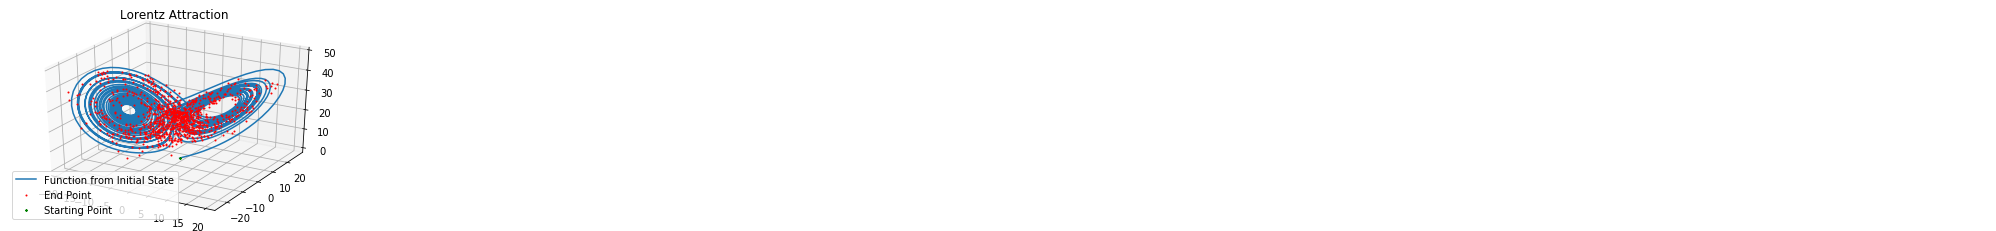

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint
import random
# Start code grabbed from 
# https://en.wikipedia.org/wiki/Lorenz_system#Python_simulation
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0
delta = 0.000000000000001

def f(state, t):
  x, y, z = state  # unpack the state vector
  return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # derivatives

def modify_state(state):
    # Increment just one of the state params
    state[0] += delta
    # Then shuffle
    random.shuffle(state)

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = scint.odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(states[:,0], states[:,1], states[:,2],
        label="Function from Initial State")
ax.scatter(states[-1,0], states[-1,1], states[-1,2],
            c='r', marker='o', s=1, label="End Point")
ax.scatter(states[0,0], states[0,1], states[0,2],
            c='g', marker='x', s=3, label="Starting Point")
for i in range(1000):
    ax.scatter(states[-1,0], states[-1,1], states[-1,2],
               c='r', marker='o', s=1)
    # Now modify state a little bit and replot
    modify_state(state0)
    states = scint.odeint(f, state0, t)
plt.legend(loc=3)
plt.title("Lorentz Attraction")
print("Final Initial State")
print(state0)
plt.show()

----------------------
## Problem 2
There's a fairly good image of diffraction of visible light at a straight edge (such as the edge of a razor blade) [here](https://dlmf.nist.gov/7.SB1). The intensity of light varies with perpendicular distance from the edge.
The intensity is given by
$$
I = \frac{I_0}{2} \left\{ [C(v) + 0.5]^2 + [S(v)+0.5]^2 \right\},
$$
where $I_0$ is the intensity of the incident light, $v$ is proportional to the distance from the edge, and $C(v)$ and $S(v)$ are the Fresnel integrals
$$
C(v) = \int_0^v \cos(\pi w^2/2) dw
$$

and 

$$
S(v) = \int_0^v \sin(\pi w^2/2) dw.
$$
Write a trapezoid rule integrator to evaluate $I/I_0$ as a function of $v$ (to at least $v=8$) and plot the results. Notice that $v$ is the limit of the integration, so you'll need to do the integrations for each value of $v$ in your plot (in other words, write a loop over the values of $v$, and do the integrals numerically for each $v$).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


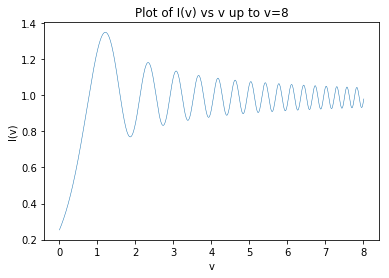

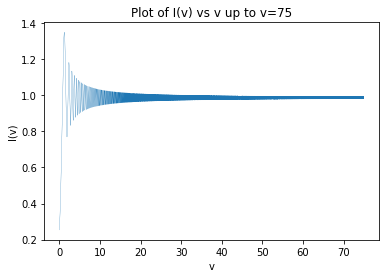

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
step = 0.0001
cprimevals = [0] # Maintain a list of vals where the most recent 
sprimevals = [0] # item in the list is area under the curve from
# zero up until the most recently updated boundary value
def trap_int(func_pntr, a, b, step, func_flag=""):
    total = 0
    domain = np.linspace(a, b, (b-a)/step) 
    # Area of a trapezoid is func(a) + func(b) / 2) * step
    if func_flag != "":
        if func_flag == "Cprime":
            total = cprimevals[-1]
        else:
            total = sprimevals[-1]
    for val in range(len(domain)-1): # Stop 1 step early for final b val
        left_endpoint = func_pntr(domain[val])
        right_endpoint = func_pntr(domain[val+1])
        trap_area = ((left_endpoint + right_endpoint)/2)
        trap_area *= (domain[val+1]-domain[val])
        if val == 0 or val == len(domain)-2:
            trap_area *= 0.5
        total += trap_area
    if func_flag == "Cprime":
        cprimevals.append(total)
    if func_flag == "Sprime":
        sprimevals.append(total)
    return total

def Cprime(v):
    return np.cos(np.pi * (v**2)/2)

def Sprime(v):
    return np.sin(np.pi * (v**2)/2)

def I(a, v):
    first_term = trap_int(Cprime, a, v, step, "Cprime") + 0.5
    first_term *= first_term

    second_term = trap_int(Sprime, a, v, step,"Sprime") + 0.5
    second_term *= second_term

    return 0.5*(first_term + second_term)

vdomain = np.linspace(0, 75, 10000)
I_output = []
a = 0
for v in range(1, len(vdomain)-1):
    I_output.append(I(vdomain[v-1], vdomain[v]))
    if v == 1070:
        plt.plot(vdomain[:1070], I_output, linewidth=0.5)
        plt.xlabel("v")
        plt.ylabel("I(v)")
        plt.title("Plot of I(v) vs v up to v=8")
        plt.show()
plt.figure()
plt.xlabel("v")
plt.ylabel("I(v)")
plt.title("Plot of I(v) vs v up to v=75")
plt.plot(vdomain[1:-1], I_output, linewidth=0.25)
plt.show()




-------------
## Problem 3
Imagine you set up an experiment in which an electron and a positron collide with center-of-mass energy, $E$, to enable the production of a new, massive particle: $e^+e^- \rightarrow X$. You'd think that, to conserve energy and momentum, the reaction would only happen when $E=M$ (we are working in "natural" units that set $c=\hbar=1$.), where $M$ is the rest mass of the $X$ particle. This is called a resonance. However, as you know from the uncertainty principle, a state with a short lifetime has an intrinsic uncertainty in its energy, and therefore its rest mass. The width of the distribution is inversely proportional to the lifetime. If $X$ has a short lifetime, there is a range of energies for which the reaction can occur, hence the resonance has a width.

The relativistic Breit-Wigner function describes this resonance, given the width $\Gamma$ (set by the lifetime of the $X$ particle, which has mass $M$):

$$
f(E) = \frac{k}{(E^2 - M^2)^2 + M^2 \Gamma^2},
$$
where the scaling factor $k$ is 
$$k = \frac{2\sqrt{2} M \Gamma \gamma}{\pi \sqrt{M^2 + \gamma}},$$
and $\gamma = \sqrt{M^2 (M^2 + \Gamma^2)}$. 


 a) Plot the Breit-Wigner distribution for a hypothetical X particle having $M=90\,\text{GeV}$ and $\Gamma = 10\,\text{GeV}$, over the range of E from 0 to 180 GeV.
	
 b) Suppose that in an experiment we select only those particles produced within $\pm 3 \Gamma$ of the B-W peak. What fraction of the particles will we keep? Use Simpson's rule to integrate the Breit-Wigner distribution and find out the answer.
 
Note that the $Z$ boson has $M=91.2\,\text{GeV}$ and $\Gamma=2.5\,\text{GeV}$, so this is a reasonably realistic particle physics example.



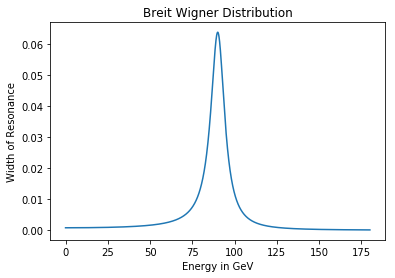

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint
E = np.linspace(0, 180, 10000)
M = 90
G = 10
def BW(E, M, G):
    g = np.sqrt(M**2*(M**2 + G**2))
    k = (2*np.sqrt(2)*M*G*g)
    k /= (np.pi * np.sqrt(M**2 + g))
    den = (E**2 - M**2)**2 + (M*G)**2
    return k/den
def max_x_y(x, y):
    target = max(y)
    for i in range(len(x)):
        if y[i] == target:
            print("Target: ", target, "\nLocated at index: ",
                  i, "\nOf X-value: ", x[i])
            return (i, x[i], y[i])
fE = BW(E, M, G)
plt.plot(E, fE)
plt.title("Breit Wigner Distribution")
plt.xlabel("Energy in GeV")
plt.ylabel("Width of Resonance")
plt.show()


In [8]:
# Part B
# Find domain of integration is +/- 3G away from xmax
index, xmax, ymax = max_x_y(E, fE)
A = xmax - G*3
B = xmax + G*3
N = 1000
h = (B-A)/(N-1)
w = np.ones(N, np.float128)*(h/3)
for i in range(1, N-1):
    w[i] *= 2
    if i % 2 == 1: w[i] *= 2
sums = 0
wsums = 0
for i in range(1, N+1):
    x = A + (i-1)*h
    sums += w[i-1]*BW(x, M, G)
    wsums += w[i-1]
print("Area under curve from +/- 3G of Target X-value = ", sums)
print("Sum of weights = ", wsums)

Target:  0.0639552213889027 
Located at index:  4999 
Of X-value:  89.99099909991
Area under curve from +/- 3G of Target X-value =  0.9041046735139753432
Sum of weights =  59.97997997997997946


-------------------
## Problem 4

a) Starting with a uniform random number generator, such as numpy's random.random() or random.rand(), use the inversion method to generate a large set ($N=10^6$ or more) of random numbers distributed as a triangle:

$$w(x)=Ax$$

for $x$ between 0 and 10. Be sure to get the normalization, $A$, right, and show a histogram of your random number distribution. (Bonus: *in addition*  you can also try the Von Neumann rejection method, though it's less efficient.)

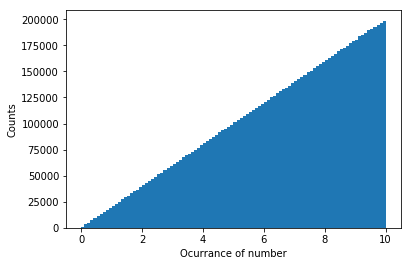

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scint

def x_i(r_i):
    # \int_a^{x_i} w(x) dx = r_i
    # For w(x) = Ax, Ax^2/2 = r_i
    # Therefore x = (2r_i/A)^0.5
    return (r_i/.01)**0.5


x = []

for i in range(10000000):
    x.append(x_i(np.random.rand()))
x = np.array(x)
plt.hist(x, bins=100)
plt.ylabel("Counts")
plt.xlabel("Ocurrance of number")
plt.title("Triangle distribution of random numbers")
plt.show()


b) Now draw 4 of the numbers from your triangle distribution and add the four numbers together. Do this for the whole sample, and histogram the results. Describe your result: the mean, the rms, and the qualitative shape of the distribution. Relate each of these to the triangle distribution from which the numbers were drawn, and explain the resulting shape of the distribution of the summed numbers.

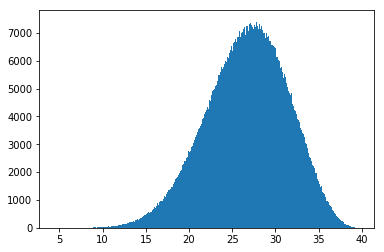

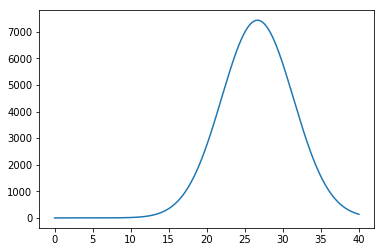

The shape of the summed distribution is a gaussian with Standard Deviation  4.714351744916894 A rms of  27.083066695799424  and a mean of  26.669596721253935 The  Histogram has a a peak frequency of  7287.0  for the sum equivalent to 27.186492692242695


In [12]:
def drawfour(x):
    # Draw four numbers from distribution, add them together,
    # Make new histogram from this
    sums = []
    for i in range(int((len(x)-4)/ 4)):
        a = x[4*i+0]
        b = x[4*i+1]
        c = x[4*i+2]
        d = x[4*i+3] 
        sums.append(a+b+c+d)
    return np.array(sums)

def gauss(x, sig, mu):
    a = np.sqrt(1/(2*np.pi*sig**2))
    b = np.exp(-((x-mu)**2)/(2*sig**2))
    return a*b
sums = drawfour(x)
plt.figure()
h1 = plt.hist(sums, bins=1000)
plt.show()


stdv = np.std(sums)
avg = np.average(sums)
t = np.linspace(0, 40, 100000)
y = gauss(t, stdv, avg)
y = np.array(y)
scale = max(h1[0]) / max(y)
rms = np.sqrt(np.mean(sums**2))
y *= scale
plt.plot(t, y)
plt.show()
print("The shape of the summed distribution is a gaussian with",
        "Standard Deviation ", stdv, "A rms of ", rms, " and a mean of ", avg, "The ",
        "Histogram has a a peak frequency of ",
        h1[0][646], " for the sum equivalent to",
        h1[1][646]) # These values were manually found in a terminal environment. Too lazy to generalize process.



Your description, observations, and conclusions here.

The shape of the summed distribution is a gaussian with Standard Deviation $\sigma = 4.714351744916894$, an rms of $27.083066695799424$, and a mean of $\mu = 26.669596721253935$ . The  Histogram of summed values has a a peak frequency of  $7287.0$  for the sum equivalent to $27.186492692242695$.

The triangle histogram relates to the gaussian because 